In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
supply_chain = pd.read_csv("C:/Users/vinee/Downloads/supply_chain_data.csv")
supply_chain.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
print(supply_chain.isnull().sum())

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [5]:
print(supply_chain.duplicated().sum())

0


[Text(0, 0, '241628'), Text(0, 0, '174455'), Text(0, 0, '161521')]

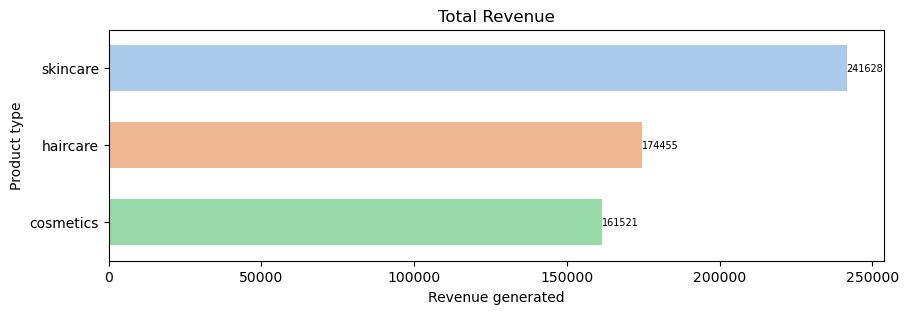

In [6]:
# total revenue in each product type
tr = supply_chain[['Product type','Revenue generated']].groupby(['Product type'],as_index=False).sum()
tr_sorted = tr.sort_values(by=['Revenue generated'],ascending=False)

fig, ax = plt.subplots(figsize=(10, 3))
sns.barplot(tr_sorted, x='Revenue generated', y='Product type',width=.6,palette='pastel')
ax.set_title('Total Revenue')
ax.bar_label(ax.containers[0],fontsize=7)

[Text(0, 0, '27'),
 Text(0, 0, '22'),
 Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '15')]

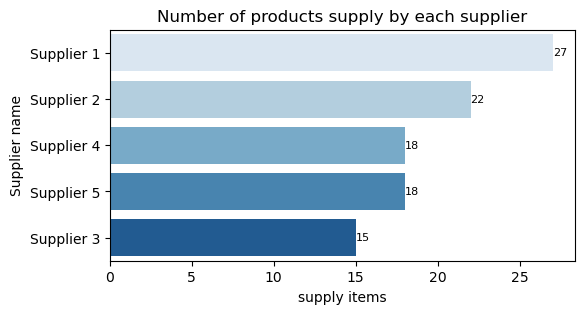

In [7]:
# products supply by each supplier
suppliers = supply_chain[['Supplier name']].value_counts().to_frame('supply items').reset_index()
suppliers_sorted = suppliers.sort_values(by='supply items',ascending=False)

fig, ax1 = plt.subplots(figsize=(6, 3))
sns.barplot(suppliers_sorted,y='Supplier name', x='supply items',ax=ax1,palette='Blues')
ax1.set_title('Number of products supply by each supplier')
ax1.bar_label(ax1.containers[0],fontsize=8)

[Text(0, 0, '25'),
 Text(0, 0, '22'),
 Text(0, 0, '20'),
 Text(0, 0, '18'),
 Text(0, 0, '15')]

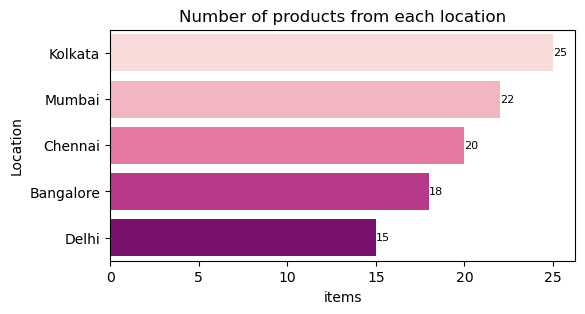

In [8]:
# products from each location
locations = supply_chain[['Location']].value_counts().to_frame('items').reset_index()
locations_sorted = locations.sort_values(by='items',ascending=False)

fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(locations_sorted,y='Location', x='items', ax=ax, palette='RdPu')
ax.set_title('Number of products from each location')
ax.bar_label(ax.containers[0],fontsize=8)

In [24]:
fig = px.line(tr, x='Product type', y='Revenue generated', title='Total Revenue by Product Type')
fig.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1, opacity=0.8)
fig.update_layout(xaxis_title='Product type', yaxis_title='Revenue generated')
fig.show()

fig = px.line(suppliers, x='Supplier name', y='supply items', title='Number of Products Supplied by Each Supplier')
fig.update_traces(marker_color='lightskyblue', marker_line_color='black', marker_line_width=1, opacity=0.8)
fig.update_layout(xaxis_title='Supplier name', yaxis_title='Supply items')
fig.show()

fig = px.line(locations, x='Location', y='items', title='Number of Products from Each Location')
fig.update_traces(marker_color='plum', marker_line_color='black', marker_line_width=1, opacity=0.8)
fig.update_layout(xaxis_title='Location', yaxis_title='Items')
fig.show()


In [13]:
# products have failed in inspection
fail = supply_chain.loc[supply_chain['Inspection results']=='Fail']
fail_s = fail[['Supplier name']].value_counts().to_frame('fail count').reset_index()
fail_s = pd.merge(fail_s, suppliers,on='Supplier name')
fail_s['fail rate']=fail_s['fail count']/fail_s['supply items']
fail_s.sort_values(by='fail rate',ascending=False)

,Supplier name,fail count,supply items,fail rate
0,Supplier 4,12,18,0.666667
2,Supplier 5,7,18,0.388889
1,Supplier 2,8,22,0.363636
3,Supplier 1,6,27,0.222222
4,Supplier 3,3,15,0.200000


In [17]:
# products below stock levels
need_order = supply_chain.loc[supply_chain['Availability']<supply_chain['Stock levels']]
need_order

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
10,skincare,SKU10,15.707796,11,996,2330.965802,Non-binary,51,13,80,...,Kolkata,18,830,5,96.527353,Pass,1.727314,Road,Route B,806.103178
12,haircare,SKU12,71.213389,41,336,2873.741446,Unknown,100,30,85,...,Kolkata,3,563,3,32.321286,Fail,2.161254,Road,Route B,402.968789
13,skincare,SKU13,16.160393,5,249,4052.738416,Male,80,8,48,...,Bangalore,23,173,10,97.829050,Pending,1.631074,Road,Route B,547.241005
14,skincare,SKU14,99.171329,26,562,8653.570926,Non-binary,54,29,78,...,Kolkata,25,558,14,5.791437,Pending,0.100683,Air,Route B,929.235290
20,skincare,SKU20,96.341072,22,320,8128.027697,Unknown,27,12,68,...,Chennai,29,309,6,65.686260,Pass,4.231417,Air,Route B,493.871215
21,cosmetics,SKU21,84.893869,60,601,7087.052696,Unknown,69,25,7,...,Chennai,19,791,4,61.735729,Pending,0.018608,Air,Route C,523.360915
22,haircare,SKU22,27.679781,55,884,2390.807867,Unknown,71,1,63,...,Kolkata,22,780,28,50.120840,Fail,2.591275,Rail,Route C,205.571996


In [18]:
# below stock levels but fail in inspection
need_order_f = supply_chain.loc[(supply_chain['Availability']<supply_chain['Stock levels'])&(supply_chain['Inspection results']=='Fail')]
print('Need to order but fail in inspection:',need_order_f.shape[0])

# below stock levels but pending in inspection
need_order_Pending = supply_chain.loc[(supply_chain['Availability']<supply_chain['Stock levels'])&(supply_chain['Inspection results']=='Pending')]
print('Need to order but pending in inspection:',need_order_Pending.shape[0])

# below stock levels and pass in inspection
need_order_Pass = supply_chain.loc[(supply_chain['Availability']<supply_chain['Stock levels'])&(supply_chain['Inspection results']=='Pass')]
print('Need to order and pass in inspection:',need_order_Pass.shape[0])

Need to order but fail in inspection: 15
Need to order but pending in inspection: 23
Need to order and pass in inspection: 13
